# Read Data

In [237]:
import pandas as pd
import numpy as np 
import seaborn as sns
import seaborn.objects as so
from seaborn import load_dataset

import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.feature_selection import mutual_info_regression

from pandas import concat

# import eli5
# from eli5.sklearn import PermutationImportance
# import shap
from xgboost import XGBRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

pd.set_option('display.max_columns', None)  # Show all columns


In [238]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [239]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## get info

In [240]:
train.info() # see missing values

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## plot target

In [241]:
from scipy.stats import norm

def hist_plot(series):
    # histogram with kde
    sns.histplot(series, bins=100, kde=True, stat="density", alpha=0.4)

    # normal 
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, loc=np.mean(series), scale=np.std(series))

    plt.plot(x, p, 'g', linewidth=2, label='Normal distribution fit')

    plt.legend()
    plt.title("Histogram with KDE and Normal Fit")
    plt.show()

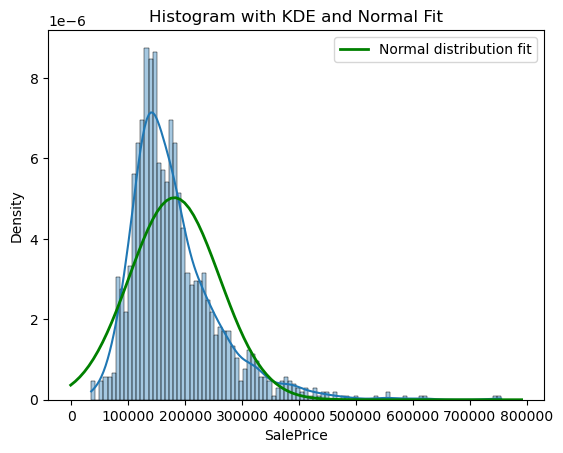

In [242]:
hist_plot(train['SalePrice'])

In [243]:
import plotly.express as px

In [244]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [245]:
def box_plot_px(df, col):
    p = px.box(data_frame=df,  y=col)
    p.show()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


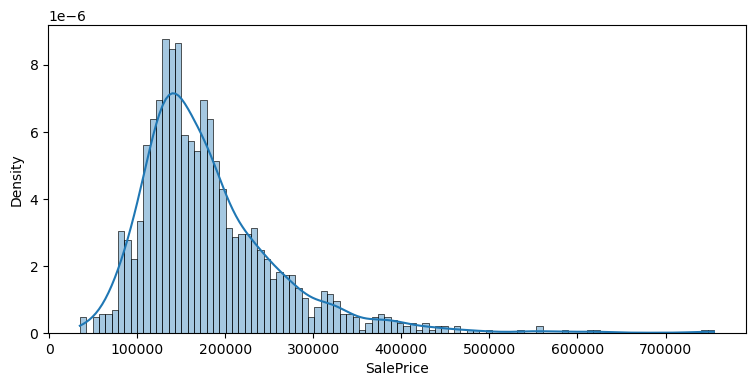

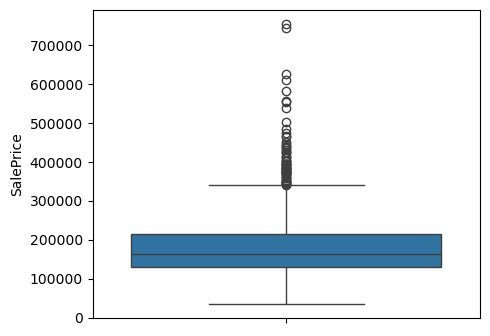

In [246]:
# plot distribution of target variable
print(train['SalePrice'].describe())

# hist
plt.figure(figsize=(9, 4))
sns.histplot(train['SalePrice'], bins=100, kde=True, stat="density", alpha=0.4)
plt.show()

#box
plt.figure(figsize=(5, 4))
sns.boxplot(train['SalePrice'])
plt.show()

## plot features

In [247]:
train_features = train.drop(columns=['SalePrice'])

In [248]:
train_y = train[['SalePrice']]

In [249]:
# use a rough seperation
cat_columns = train_features.select_dtypes(include = ['object']).columns
num_columns = train_features.select_dtypes(include = ['float64', 'int64']).columns

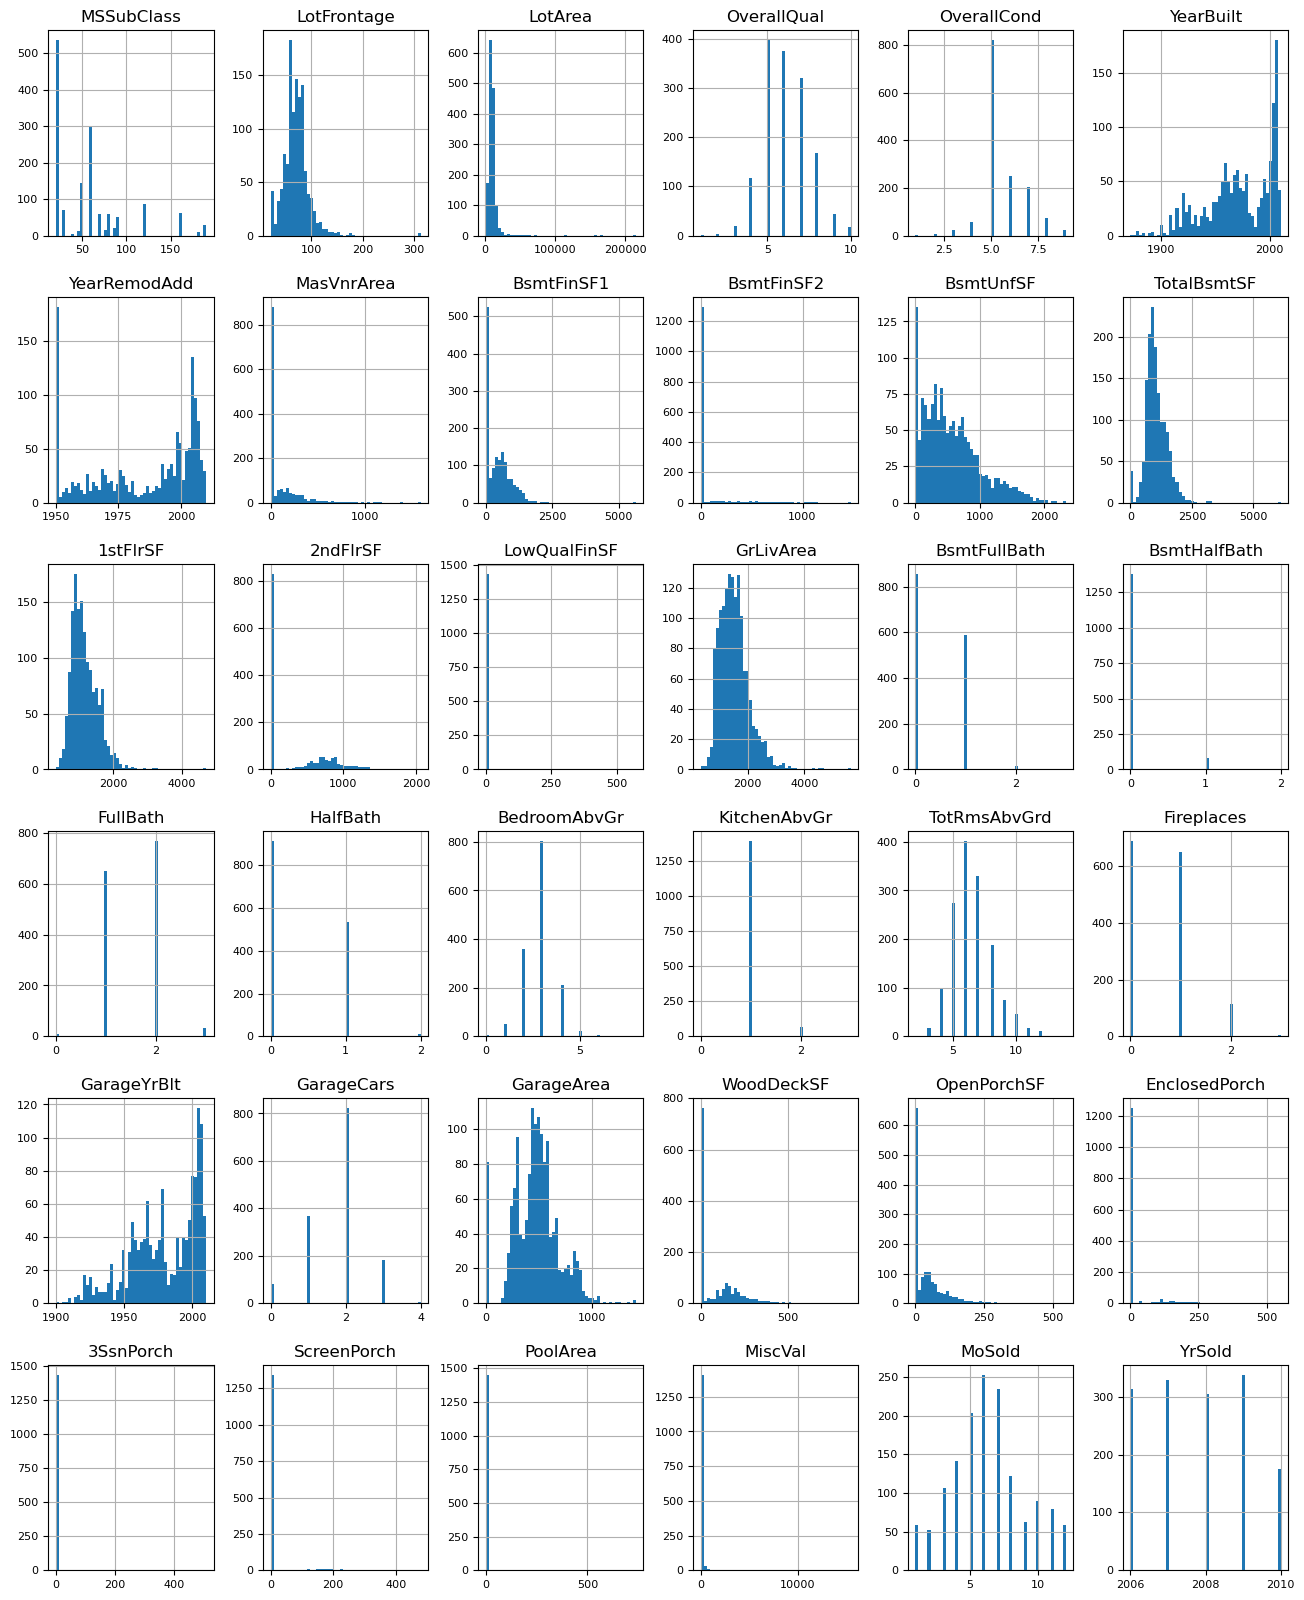

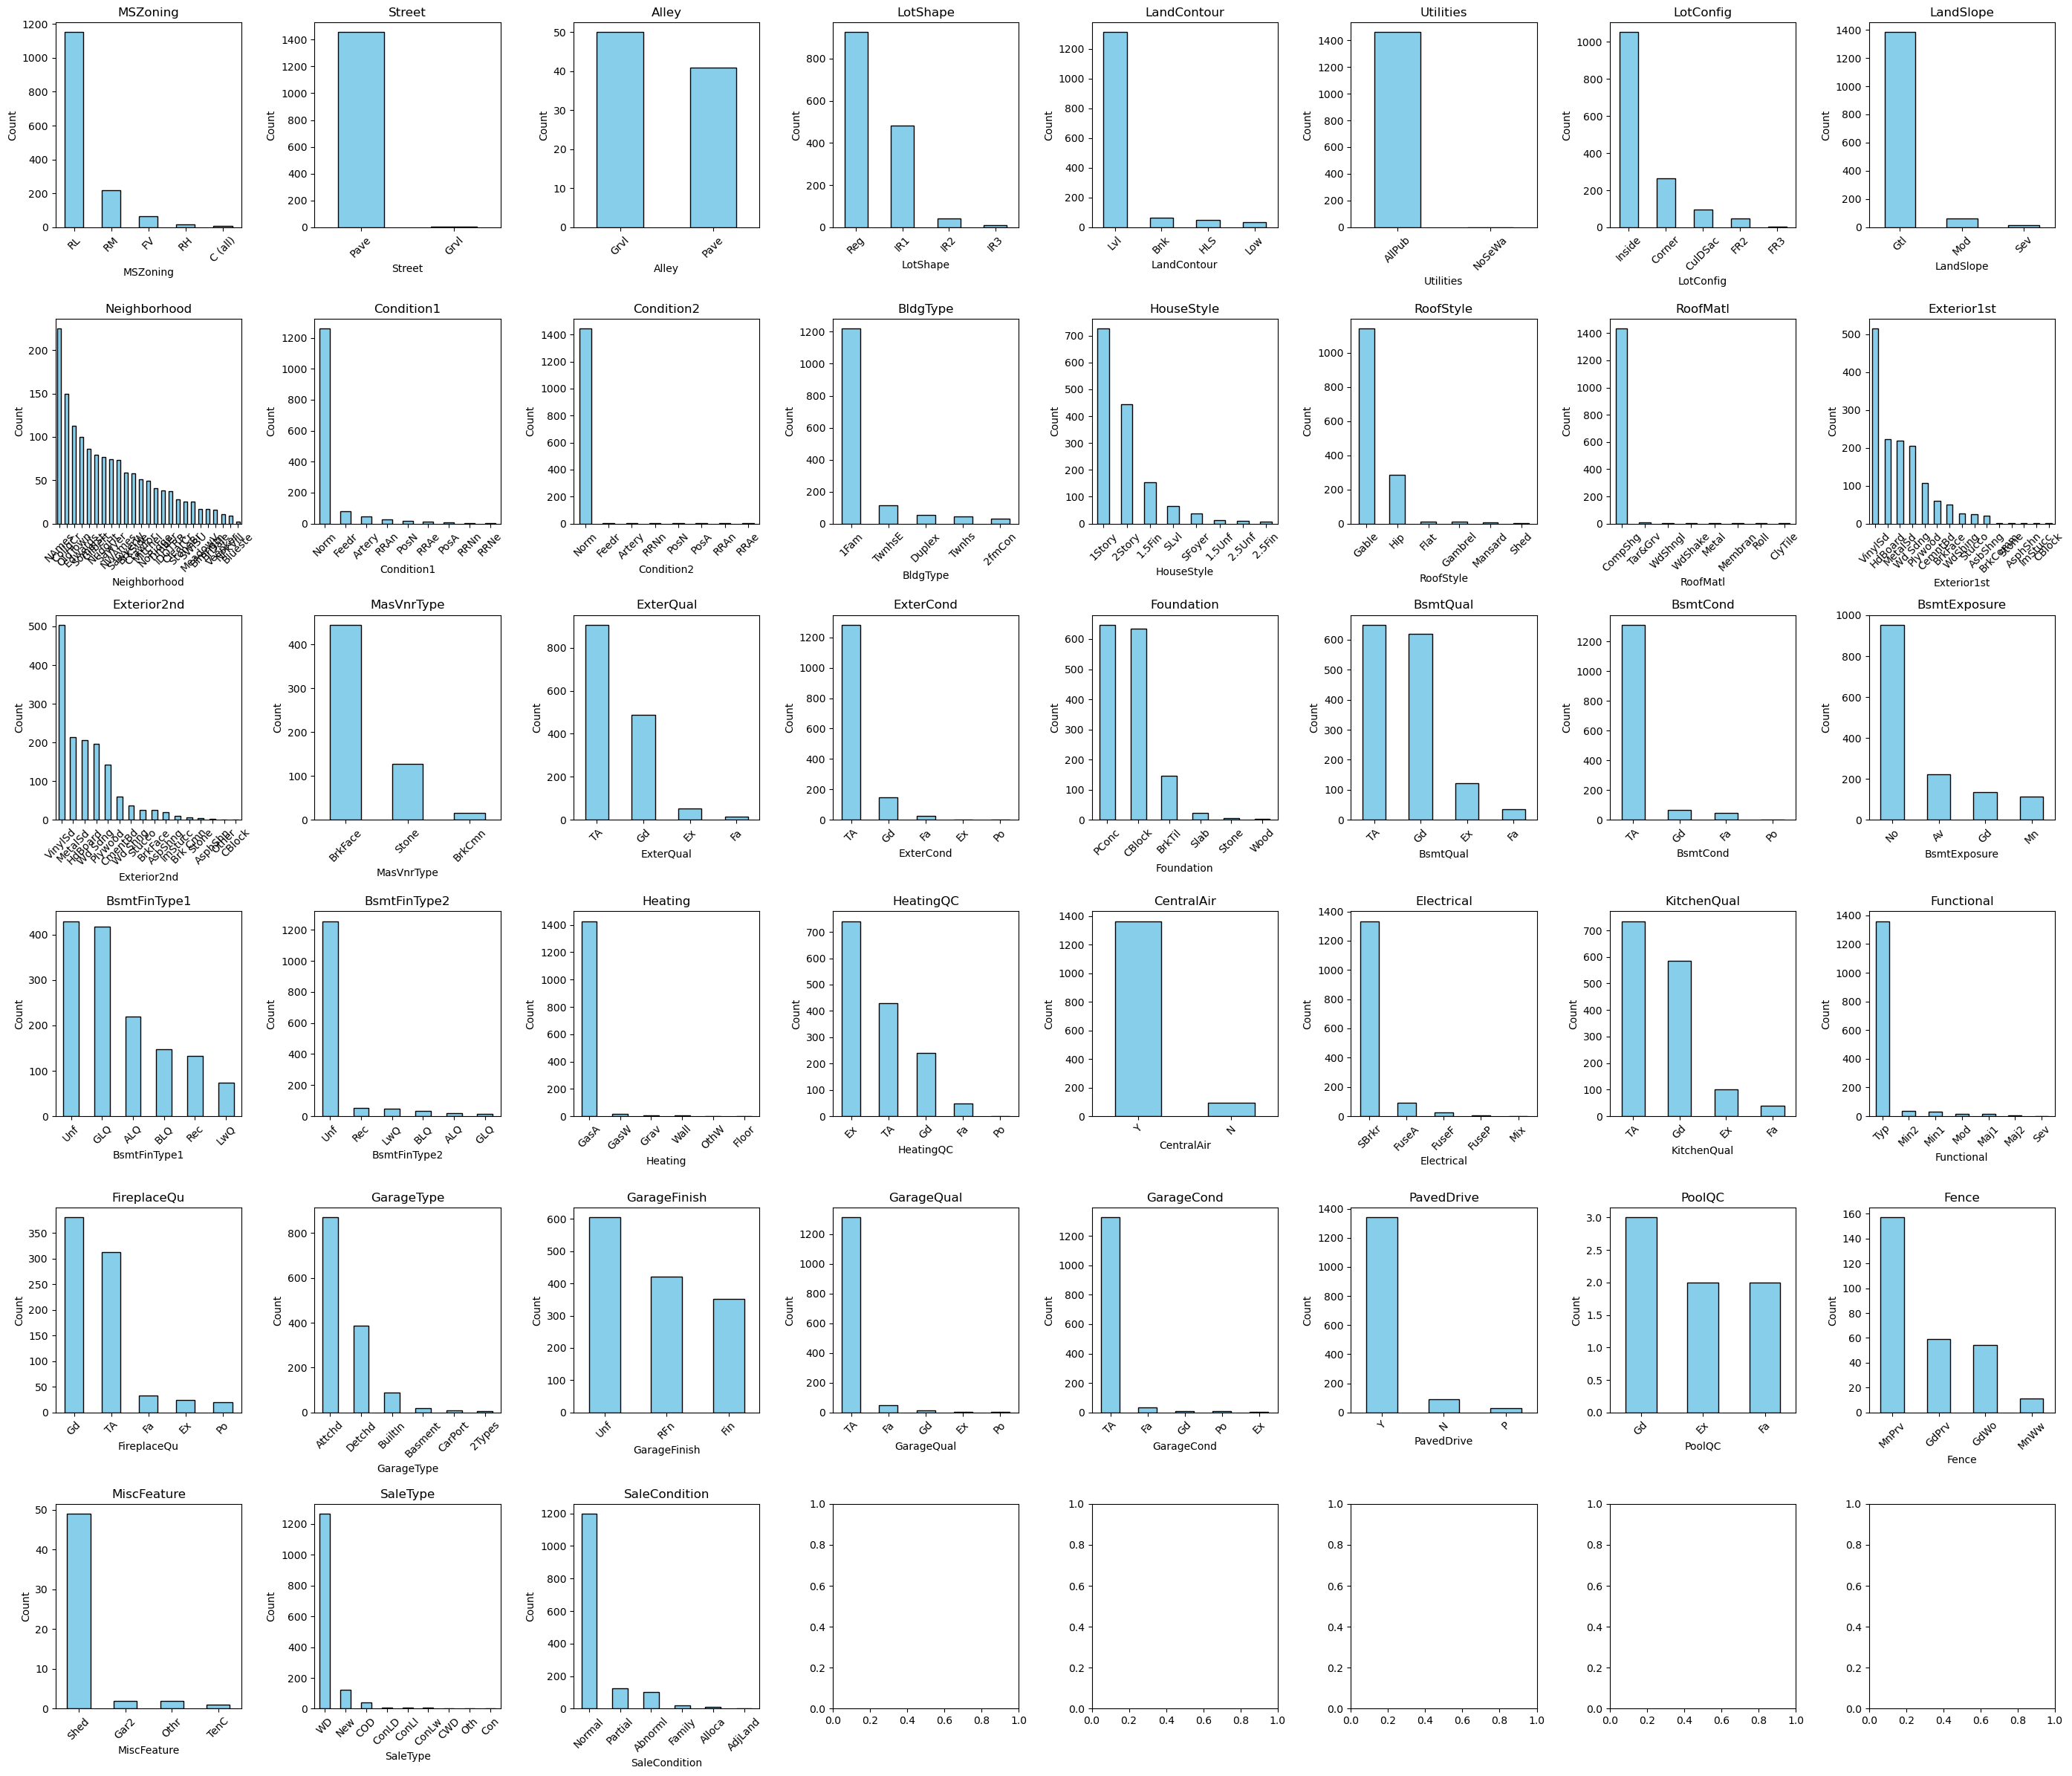

In [250]:
# plot distribution of numeric columns
train_features[num_columns].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()


# Plot all categorical columns
fig, axes = plt.subplots(6, 8, figsize=(28, 24))
axes = axes.flatten()
for i, col in enumerate(cat_columns):
    train[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Preprocess

### fill missing data if 'na' has a meaning (eg. no garage)

In [251]:
# fill with string 'NA' if it has a meaning
for col in ['Alley',
            'GarageType',
            'GarageQual',
            'GarageCond',
            'GarageFinish',
            'FireplaceQu',
            'PoolQC',
            'Fence',
            'MiscFeature',
            'BsmtQual',
            'BsmtCond',
            'BsmtExposure',
            'BsmtFinType1',
            'BsmtFinType2']:
    train_features[col] = train_features[col].fillna('NA')
    test[col] = test[col].fillna('NA')

## a more precise seperation

In [252]:
Ordinal_map = {
    'ExterQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual' : ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual' : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond' : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu' : ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageCond': ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure' : ['NA','No', 'Mn', 'Av', 'Gd'],
    'BsmtFinType1' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'BsmtFinType2' : ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    'Functional': ['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
    'GarageFinish': ['NA','Unf','RFn','Fin'],
    'PavedDrive': ['N','P','Y'],
    'PoolQC': ['NA','Fa','TA','Gd','Ex'],
    'Fence': ['NA','MnWw','GdWo','MnPrv','GdPrv'],
    'OverallQual': ['1','2','3','4','5','6','7','8','9','10'],
    'OverallCond': ['1','2','3','4','5','6','7','8','9','10']
}

Numeric_categorical_columns = ['MSSubClass','OverallQual','OverallCond']

In [253]:
def get_columns_by_type(df, Ordinal_map=Ordinal_map, Numeric_categorical_columns=Numeric_categorical_columns):
    ord_columns = list(Ordinal_map.keys())
    # union the numeric categorical and exclude the ordinal
    cat_columns = list((set(df.select_dtypes(include = ['object']).columns) | set(Numeric_categorical_columns)) - set(ord_columns)) 
    num_columns = list(set(df.select_dtypes(include = ['float64', 'int64']).columns) - set(Numeric_categorical_columns))
    return ord_columns, cat_columns, num_columns


In [254]:
ord_columns, cat_columns, num_columns = get_columns_by_type(train_features)

In [255]:
# check if the three sets are disjoint
assert set(cat_columns).isdisjoint(set(num_columns)), "cat_columns and num_columns should be disjoint sets"
assert set(ord_columns).isdisjoint(set(cat_columns)), "ord_columns and cat_columns should be disjoint sets"

## Encode/standardize data

### Encode ordinal data

In [256]:
def encode_ordinal_features(train, test, ordinal_map, ord_columns):
    # order the ordinal columns
    ordered_categories=list(map(lambda x: ordinal_map[x], ord_columns))
    # Encode ordinal 
    ord_encoder = OrdinalEncoder(categories = ordered_categories, 
                                 handle_unknown='use_encoded_value', 
                                 unknown_value=np.nan).fit(train[ord_columns])
    train[ord_columns] = ord_encoder.transform(train[ord_columns])
    test[ord_columns] = ord_encoder.transform(test[ord_columns])
    return train, test

In [257]:
train_features, test  = encode_ordinal_features(train_features, test, Ordinal_map, ord_columns)

### Encode categorical data


In [258]:
def encode_categorical_features(train, test, cat_columns):
    cat_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    cat_encoder.fit(train[cat_columns])
    train[cat_columns] = cat_encoder.transform(train[cat_columns])
    test[cat_columns] = cat_encoder.transform(test[cat_columns])
    return train, test, cat_encoder

In [259]:
train_features.shape

(1460, 79)

In [260]:
train_features, test, cat_encoder = encode_categorical_features(train_features, 
                                                                test, cat_columns)

In [261]:
def print_ordinalEncoder_relationship(encoder, df):
    # Print the mapping
    for i, categories in enumerate(encoder.categories_):
        print(f"Feature {df.columns[i]}:")
        for idx, category in enumerate(categories):
            print(f"  {category} --> {idx}")

In [262]:
print_ordinalEncoder_relationship(cat_encoder, train_features)

Feature MSSubClass:
  1.5Fin --> 0
  1.5Unf --> 1
  1Story --> 2
  2.5Fin --> 3
  2.5Unf --> 4
  2Story --> 5
  SFoyer --> 6
  SLvl --> 7
Feature MSZoning:
  1Fam --> 0
  2fmCon --> 1
  Duplex --> 2
  Twnhs --> 3
  TwnhsE --> 4
Feature LotFrontage:
  Artery --> 0
  Feedr --> 1
  Norm --> 2
  PosA --> 3
  PosN --> 4
  RRAe --> 5
  RRAn --> 6
  RRNn --> 7
Feature LotArea:
  Bnk --> 0
  HLS --> 1
  Low --> 2
  Lvl --> 3
Feature Street:
  Gtl --> 0
  Mod --> 1
  Sev --> 2
Feature Alley:
  Gar2 --> 0
  NA --> 1
  Othr --> 2
  Shed --> 3
  TenC --> 4
Feature LotShape:
  BrkTil --> 0
  CBlock --> 1
  PConc --> 2
  Slab --> 3
  Stone --> 4
  Wood --> 5
Feature LandContour:
  C (all) --> 0
  FV --> 1
  RH --> 2
  RL --> 3
  RM --> 4
Feature Utilities:
  ClyTile --> 0
  CompShg --> 1
  Membran --> 2
  Metal --> 3
  Roll --> 4
  Tar&Grv --> 5
  WdShake --> 6
  WdShngl --> 7
Feature LotConfig:
  COD --> 0
  CWD --> 1
  Con --> 2
  ConLD --> 3
  ConLI --> 4
  ConLw --> 5
  New --> 6
  Oth --> 7
  W

In [263]:
def decode_ordinalEncoder(encoder, df_encoded):
    decoded = encoder.inverse_transform(df_encoded)
    return decoded

In [264]:
decode_ordinalEncoder(cat_encoder,train_features[cat_columns])


array([['2Story', '1Fam', 'Norm', ..., 'CollgCr', 'BrkFace', 'AllPub'],
       ['1Story', '1Fam', 'Norm', ..., 'Veenker', nan, 'AllPub'],
       ['2Story', '1Fam', 'Norm', ..., 'CollgCr', 'BrkFace', 'AllPub'],
       ...,
       ['2Story', '1Fam', 'Norm', ..., 'Crawfor', nan, 'AllPub'],
       ['1Story', '1Fam', 'Norm', ..., 'NAmes', nan, 'AllPub'],
       ['1Story', '1Fam', 'Norm', ..., 'Edwards', nan, 'AllPub']],
      dtype=object)

### Standardize numeric columns (Optional)

In [265]:
def standardize_num_columns(train, test, num_columns):
    scaler = StandardScaler()
    train[num_columns] = scaler.fit_transform(train[num_columns])
    test[num_columns] = scaler.transform(test[num_columns])
    return train, test
# train, test = standardize_num_columns(train, test, num_columns)

## outliers/ unreasonable data

In [266]:
# detect extremely imbalanced features
def detect_imbalanced_features(df, threshold=0.9):
    cols=[]
    for col in df.columns:
        most_common_value = df[col].value_counts(dropna=False).idxmax()
        count = df[col].value_counts(dropna=False).max()
        
        if count > len(df) * threshold:
            print(f"Column '{col}': value '{most_common_value}' appears {count} times out of {len(df)}, ({count/len(df):.1%})")
            cols.append(col)
    return cols

In [267]:
imbalanced_features = detect_imbalanced_features(train_features, threshold=0.95)

Column 'Street': value '1.0' appears 1454 times out of 1460, (99.6%)
Column 'Utilities': value '0.0' appears 1459 times out of 1460, (99.9%)
Column 'Condition2': value '2.0' appears 1445 times out of 1460, (99.0%)
Column 'RoofMatl': value '1.0' appears 1434 times out of 1460, (98.2%)
Column 'Heating': value '1.0' appears 1428 times out of 1460, (97.8%)
Column 'LowQualFinSF': value '0' appears 1434 times out of 1460, (98.2%)
Column 'KitchenAbvGr': value '1' appears 1392 times out of 1460, (95.3%)
Column '3SsnPorch': value '0' appears 1436 times out of 1460, (98.4%)
Column 'PoolArea': value '0' appears 1453 times out of 1460, (99.5%)
Column 'PoolQC': value '0.0' appears 1453 times out of 1460, (99.5%)
Column 'MiscFeature': value '1.0' appears 1406 times out of 1460, (96.3%)
Column 'MiscVal': value '0' appears 1408 times out of 1460, (96.4%)


In [268]:
# update column lists and categorical encoder when column changes 
def update_col_groups(column_list, col_dropped = imbalanced_features):
    return [c for c in column_list if c not in col_dropped]

def drop_columns_and_rows(train_features, test, train_y, cat_encoder, ord_columns, cat_columns, num_columns , columns_to_drop=None, rows_to_drop=None):
    # undo category encoding
    train_features[cat_columns] = cat_encoder.inverse_transform(train_features[cat_columns])
    test[cat_columns] = cat_encoder.inverse_transform(test[cat_columns])

    if columns_to_drop:
        # drop columns
        train_features = train_features.drop(columns=columns_to_drop)
        test = test.drop(columns=columns_to_drop)
        
        # update column lists
        ord_columns, cat_columns, num_columns =  list(map(lambda c: update_col_groups(c, imbalanced_features),[ord_columns, cat_columns, num_columns]))

    if rows_to_drop:
        # drop rows
        train_features = train_features.drop(index=rows_to_drop)
        train_y = train_y.drop(index=rows_to_drop)

    # redo category encoding
    train_features, test, cat_encoder = encode_categorical_features(train_features, test, cat_columns)
    return (train_features, test, cat_encoder), train_features, test, train_y,(ord_columns, cat_columns, num_columns)

In [269]:
# zscore method to detect outliers
def outliers_zscore(df, num_columns, ycol= 'SalePrice'):
    df[ycol].hist(figsize=(10,2))
    plt.show()
    for col in num_columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        outliers = df[(z_scores.abs() > 10)]
        if not outliers.empty:
            print(f"Column '{col}' has {len(outliers)} outliers.")
            display(outliers[[col,ycol]])
            df[col].hist(figsize=(5,2))
            plt.show()

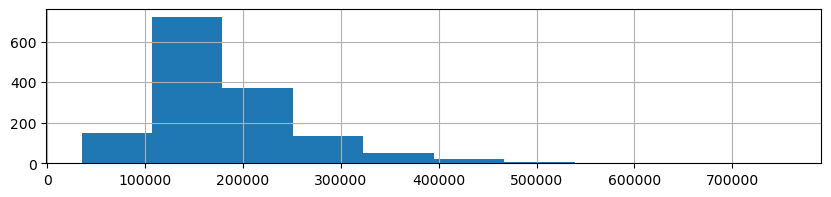

Column 'PoolArea' has 7 outliers.


,PoolArea,SalePrice
Id,,
198,512,235000
811,648,181000
1171,576,171000
1183,555,745000
1299,480,160000
1387,519,250000
1424,738,274970


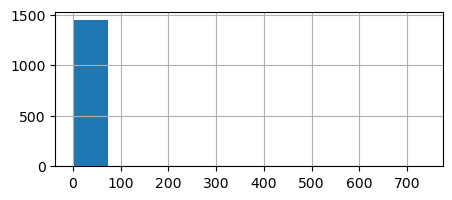

Column 'LotFrontage' has 2 outliers.


,LotFrontage,SalePrice
Id,,
935,313.0,242000
1299,313.0,160000


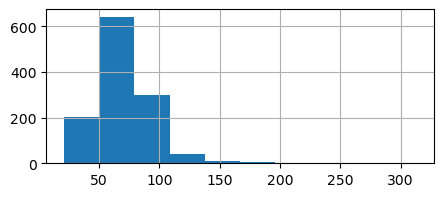

Column '3SsnPorch' has 4 outliers.


,3SsnPorch,SalePrice
Id,,
6,320,143000
56,407,180500
206,508,180500
1438,304,394617


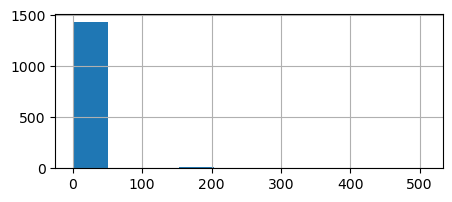

Column 'MiscVal' has 2 outliers.


,MiscVal,SalePrice
Id,,
347,15500,151500
1231,8300,190000


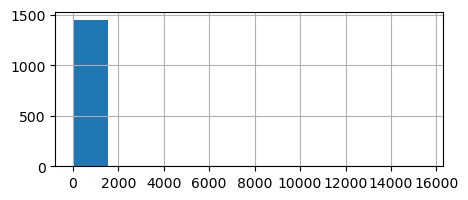

Column 'LotArea' has 4 outliers.


,LotArea,SalePrice
Id,,
250,159000,277000
314,215245,375000
336,164660,228950
707,115149,302000


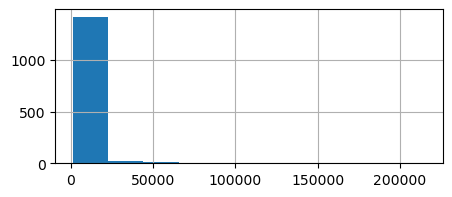

Column 'LowQualFinSF' has 5 outliers.


,LowQualFinSF,SalePrice
Id,,
89,513,85000
171,528,128500
186,572,475000
636,515,200000
1010,514,102000


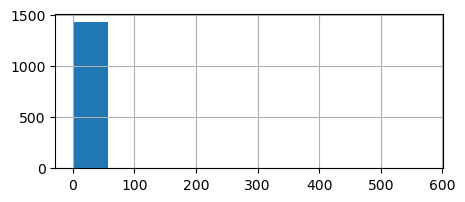

Column 'BsmtFinSF1' has 1 outliers.


,BsmtFinSF1,SalePrice
Id,,
1299,5644,160000


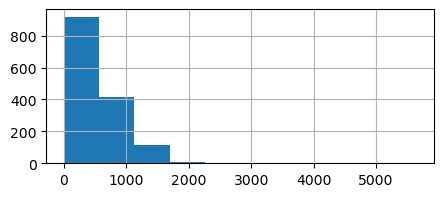

Column 'TotalBsmtSF' has 1 outliers.


,TotalBsmtSF,SalePrice
Id,,
1299,6110,160000


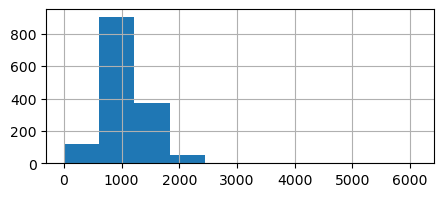

In [270]:
outliers_zscore(pd.concat([train_features, train_y],axis=1), num_columns)

In [271]:
(train_features, test, cat_encoder), train_features, test, train_y, (ord_columns, cat_columns, num_columns) = \
    drop_columns_and_rows(train_features, test,train_y, cat_encoder, ord_columns, cat_columns, num_columns , columns_to_drop=None, rows_to_drop=[1299])

## Impute missing values

In [272]:
missing_train_features = train_features.isnull().sum()
missing_train_features = missing_train_features[missing_train_features > 0].sort_values(ascending=False)
missing_train_features

MasVnrType     872
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Electrical       1
dtype: int64

In [273]:
missing_test_features = test.isnull().sum()
missing_test_features = missing_test_features[missing_test_features > 0].sort_values(ascending=False)
missing_test_features

MasVnrType      894
LotFrontage     227
GarageYrBlt      78
MasVnrArea       15
BsmtFullBath      2
BsmtHalfBath      2
Functional        2
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
KitchenQual       1
GarageCars        1
GarageArea        1
dtype: int64

In [274]:
features_to_impute = list(set(missing_train_features.index)| set(missing_test_features.index))
features_to_impute

['BsmtHalfBath',
 'BsmtUnfSF',
 'GarageCars',
 'GarageYrBlt',
 'Electrical',
 'Functional',
 'KitchenQual',
 'MasVnrArea',
 'GarageArea',
 'BsmtFullBath',
 'BsmtFinSF2',
 'MasVnrType',
 'BsmtFinSF1',
 'LotFrontage',
 'TotalBsmtSF']

In [275]:
from sklearn.impute import KNNImputer

def impute_knn(train_features, test, features_to_impute, num_columns=5, num_neighbors=5):
    for feat in features_to_impute:
        # use the 5 most correlated features to impute
        corrs = train_features.corr()[feat].sort_values(key=abs, ascending=False)
        imputecols = corrs[:num_columns+1].index.tolist()
        knnImputer = KNNImputer(n_neighbors=num_neighbors)
        knnImputer.fit(train_features[imputecols])
        train_features[feat] = knnImputer.transform(train_features[imputecols])[:, 0]
        test[feat] = knnImputer.transform(test[imputecols])[:, 0]
    return train_features, test


In [276]:
train_features, test = impute_knn(train_features, test, features_to_impute, num_columns=5, num_neighbors=5)

In [277]:
# check if no missing values now
train_features.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

## OneHot Encodding for categorical features (Optional)

In [278]:
train_features[cat_columns] = cat_encoder.inverse_transform(train_features[cat_columns])
test[cat_columns] = cat_encoder.inverse_transform(test[cat_columns])

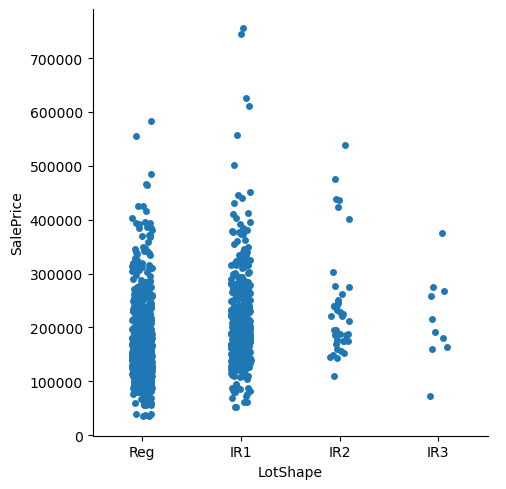

In [279]:
sns.catplot(x='LotShape', y='SalePrice', data=train)

In [280]:
OH = OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop = 'first')
train_cat_columns_oh = pd.DataFrame(OH.fit_transform(train_features[cat_columns]), 
                          columns=OH.get_feature_names_out(cat_columns), index=train_features.index)
train_features =pd.concat([train_features.drop(columns=cat_columns),train_cat_columns_oh], axis=1)

test_cat_columns_oh = pd.DataFrame(OH.transform(test[cat_columns]), 
                          columns=OH.get_feature_names_out(cat_columns), index=test.index)
test_features = pd.concat([test.drop(columns=cat_columns), test_cat_columns_oh], axis=1)

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [7, 9, 15, 22, 23, 26] during transform. These unknown categories will be encoded as all zeros



# Feature Engineering

In [281]:
train_features['Feat_roughLivingArea'] = train_features['1stFlrSF'] + train_features['2ndFlrSF'] + train_features['TotalBsmtSF']
test_features['Feat_roughLivingArea'] = test_features['1stFlrSF'] + test_features['2ndFlrSF'] + test_features['TotalBsmtSF']

In [282]:
train_features['Feat_LotsizeScore'] = 1.5*train_features.LotFrontage**2 + train_features.LotArea
test_features['Feat_LotsizeScore'] = 1.5*test_features.LotFrontage**2 + test_features.LotArea

In [283]:
train_features['Feat_numYrsFeat'] = ((2025-train_features['YearBuilt'])+ (2025-train_features['YearRemodAdd']))/2
test_features['Feat_numYrsFeat'] = ((2025-test_features['YearBuilt'])+ (2025-test_features['YearRemodAdd']))/2

# Models

## split data into train and test sets

In [284]:
X = train_features
y = train_y
test = test_features

In [285]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def performance(y_test, y_pred):
    # Calcul des métriques de performance
    r2 = r2_score(y_test, y_pred)  # R² (proportion de variance expliquée)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Erreur quadratique moyenne
    mae = mean_absolute_error(y_test, y_pred)  # Erreur absolue moyenne

    print(f'\nR² Score: {r2:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    return r2,rmse,mae

In [287]:
def performance_both(y_train, y_train_pred, y_test, y_pred):
    print('\ntraining performance')
    r2_train,rmse_train,mae_train = performance(y_train, y_train_pred)
    print('\ntest performance')
    r2_test,rmse_test,mae_test = performance(y_test, y_pred)
    return (r2_train,rmse_train,mae_train),(r2_test,rmse_test,mae_test)

## Linear Regression

In [288]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear_all = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred_train_linear = linear_all.predict(X_train)
y_pred_linear = linear_all.predict(X_test)

(r2_train,rmse_train,mae_train),(r2_test,rmse_test,mae_test) = performance_both(y_train, y_pred_train_linear, y_test, y_pred_linear)


training performance

R² Score: 0.93
RMSE: 20580.45
MAE: 13918.89

test performance

R² Score: 0.85
RMSE: 34275.74
MAE: 21092.48


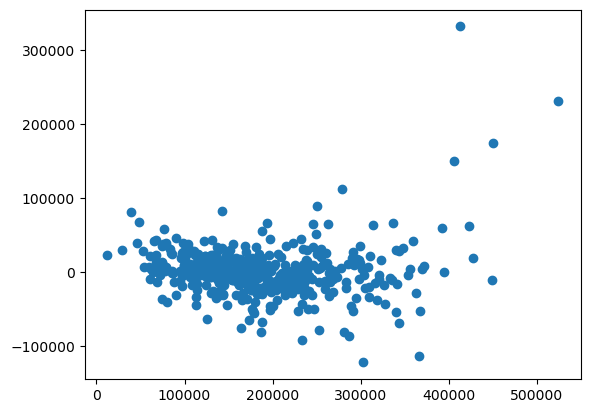

In [289]:
plt.scatter(y_pred_linear,y_test- y_pred_linear)

### WLS

In [290]:
from sklearn.linear_model import LinearRegression

# Calculate absolute errors from previous predictions
errors = np.abs(y_train.values.flatten() - y_pred_train_linear.flatten())
weights = 1 / (errors + 1e-6)  # Add small constant to avoid division by zero

# Fit WLS using sample_weight
wls_sklearn = LinearRegression()
wls_sklearn.fit(X_train, y_train, sample_weight=weights)

# Predict on test set
y_pred_wls_sklearn = wls_sklearn.predict(X_test)

# Evaluate performance
(r2_train,rmse_train,mae_train),(r2_test,rmse_test,mae_test) = performance_both(y_train, wls_sklearn.predict(X_train), y_test, y_pred_wls_sklearn)



training performance

R² Score: 0.92
RMSE: 20760.21
MAE: 13262.90

test performance

R² Score: 0.85
RMSE: 33601.97
MAE: 20381.06


In [291]:
# on the whole dataset
performance(y,  wls_sklearn.predict(X))


R² Score: 0.90
RMSE: 25721.88
MAE: 15614.48


(0.8951616517299359, 25721.87800088347, 15614.47932388155)

### feature selection using r2

In [292]:
# # very slow
# from sklearn.feature_selection import SequentialFeatureSelector

# model = LinearRegression()

# sfs = SequentialFeatureSelector(
#     estimator=model,
#     n_features_to_select='auto',    
#     direction='forward',         
#     scoring='r2',
#     cv=5
# )
# sfs.fit(X_train, y_train)
# selected_features_sfs = X.columns[sfs.get_support()]
# model_lr_aic = LinearRegression().fit(X_train[selected_features_sfs], y_train)
# y_pred = model_lr_aic.predict(X_test[selected_features_sfs])
# performance(y_test, y_pred)

In [293]:
#Recursive feature elimination with cross-validation to select features.

estimator = LinearRegression()
rfe = RFECV(estimator, step=1, cv=5, scoring='neg_mean_absolute_error') #r2
rfe.fit(X_train, y_train)
selected_features_sfs = X.columns[rfe.get_support()]
model_lr_aic = LinearRegression().fit(X_train[selected_features_sfs], y_train)
y_pred = model_lr_aic.predict(X_test[selected_features_sfs])
performance(y_test, y_pred)


R² Score: 0.84
RMSE: 34521.59
MAE: 21443.86


(0.8429286255195143, 34521.589447864324, 21443.85665982757)

### feature selection using aic

In [294]:
def aic_lr(n,k,mse):
    """
    Compute the Akaike Information Criterion (AIC) for a linear regression model.
    """
    log_likelihood = -n/2 * np.log(2 * np.pi * mse) - n/2
    return -2 * log_likelihood + 2 * k

In [295]:
# Forward Selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def forward_select_features_aic(X_train, y_train, X_test, y_test):
    selected_features_aic = []
    remaining_features = list(X_train.columns)
    best_score = float('inf')
    n = len(X_train)
    while remaining_features:
        print('len(selected_features_aic)', len(selected_features_aic), best_score)
        best_new_score, best_candidate = float('inf'), None
        for candidate in remaining_features:
            features_to_try = selected_features_aic + [candidate]
            model = LinearRegression().fit(X_train[features_to_try], y_train)
            y_pred = model.predict(X_test[features_to_try])
            mse = mean_squared_error(y_test, y_pred)
            aic=aic_lr(n, len(features_to_try), mse)
            if aic < best_new_score:
                best_new_score = aic
                best_candidate = candidate
        if best_candidate is not None and best_new_score < best_score:
            selected_features_aic.append(best_candidate)
            remaining_features.remove(best_candidate)
            best_score = best_new_score
        else:
            break
    return selected_features_aic

In [296]:
selected_features_aic = forward_select_features_aic(X_train, y_train, X_test, y_test)

len(selected_features_aic) 0 inf
len(selected_features_aic) 1 23730.28093759958
len(selected_features_aic) 2 23373.285175535228
len(selected_features_aic) 3 23285.188657939387
len(selected_features_aic) 4 23223.321045098368
len(selected_features_aic) 5 23179.786945674037
len(selected_features_aic) 6 23143.080373941953
len(selected_features_aic) 7 23110.77500331452
len(selected_features_aic) 8 23086.164672043767
len(selected_features_aic) 9 23063.863505280107
len(selected_features_aic) 10 23043.793615664952
len(selected_features_aic) 11 23023.58382133727
len(selected_features_aic) 12 23006.960043879295
len(selected_features_aic) 13 22988.502741574415
len(selected_features_aic) 14 22958.559255520224
len(selected_features_aic) 15 22940.904131195755
len(selected_features_aic) 16 22925.585735179247
len(selected_features_aic) 17 22906.56227340766
len(selected_features_aic) 18 22883.981538208413
len(selected_features_aic) 19 22870.445464073964
len(selected_features_aic) 20 22852.93136735446
l

In [297]:
model_lr_aic = LinearRegression().fit(X_train[selected_features_aic], y_train)
y_pred = model_lr_aic.predict(X_test[selected_features_aic])
performance(y_test, y_pred)


R² Score: 0.91
RMSE: 26021.45
MAE: 17402.04


(0.9107561009109796, 26021.452176022412, 17402.03692258795)

In [298]:
def wls(errors,X_train, y_train, X_test, y_test):

    # Calculate absolute errors from previous predictions
    # errors = np.abs(y_train.values.flatten() - model_lr_aic.predict(X_train[selected_features_aic]).flatten())
    weights = 1 / (errors + 1e-6)  # Add small constant to avoid division by zero

    # Fit WLS using sample_weight (no feature selection but use the )
    wls_sklearn = LinearRegression()
    wls_sklearn.fit(X_train, y_train, sample_weight=weights)

    # Predict on test set
    y_pred_wls_sklearn = wls_sklearn.predict(X_test)

    # Evaluate performance
    (r2_train,rmse_train,mae_train), (r2_test,rmse_test,mae_test) = performance_both(y_train, wls_sklearn.predict(X_train), y_test, y_pred_wls_sklearn)

    # on the whole dataset
    performance(y,  wls_sklearn.predict(X))
    return wls_sklearn

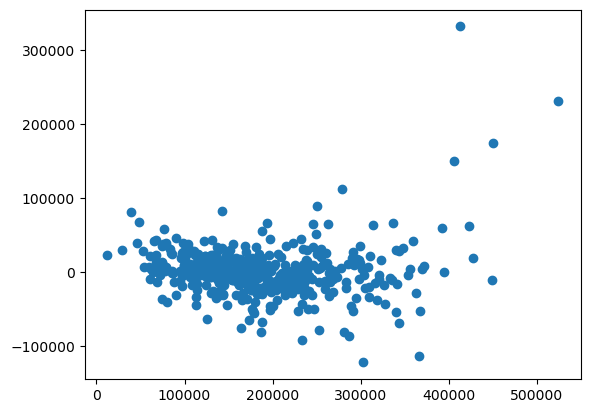

In [299]:
plt.scatter(y_pred_linear,y_test- y_pred_linear)

In [300]:
errors = np.abs(y_train.values.flatten() - model_lr_aic.predict(X_train[selected_features_aic]).flatten())
wls_sklearn = wls(errors,X_train, y_train, X_test, y_test)


training performance

R² Score: 0.90
RMSE: 23805.34
MAE: 14274.10

test performance

R² Score: 0.88
RMSE: 30171.81
MAE: 18056.59

R² Score: 0.89
RMSE: 26081.06
MAE: 15523.69


In [301]:
wls_sklearn.predict(test_features)

array([[120390.83666939],
       [177336.49001898],
       [177682.59726673],
       ...,
       [181332.98584139],
       [127673.94121711],
       [229349.04911967]])

## Lasso

In [321]:

from sklearn.linear_model import LassoCV
def lasso_plot(lasso):
    alpha_range = lasso.alphas_
    mse_values = lasso.mse_path_.mean(axis = 1)
    sd_values = lasso.mse_path_.std(axis = 1)

    plt.plot(np.log(alpha_range), mse_values, "k-o")
    plt.plot(np.log(alpha_range), mse_values + sd_values, "r--")
    plt.plot(np.log(alpha_range), mse_values - sd_values, "r--")
    plt.fill_between(np.log(alpha_range),
                    mse_values + sd_values,
                    mse_values - sd_values, alpha = .2)
    print("alpha (regularization):", lasso.alpha_) #regularization
    plt.plot([np.log(lasso.alpha_)] * 2, [0, (mse_values + sd_values).max()])  # 
    plt.xlabel(r"$log(\alpha)$")
    plt.ylabel("f{n_folds}-Fold CV MSE")
    plt.show()


def lasso_model(X_train, y_train, X_test, y_test, n_folds = 5):
    n_folds = 5
    lasso = LassoCV(n_alphas = 100, cv = n_folds)
    lasso.fit(X_train, y_train)
    lasso_plot(lasso)

    coef = pd.DataFrame(lasso.coef_, index=X_train.columns, columns=['betas'])
    selected_cols_lasso = coef[coef["betas"] != 0].index.tolist()
    print(len(selected_cols_lasso), selected_cols_lasso)

    y_pred_lasso = lasso.predict(X_test)
    r2,rmse,mae = performance(y_test, y_pred_lasso)
    return y_pred_lasso,lasso


alpha (regularization): 329171.86053817533


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1664: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



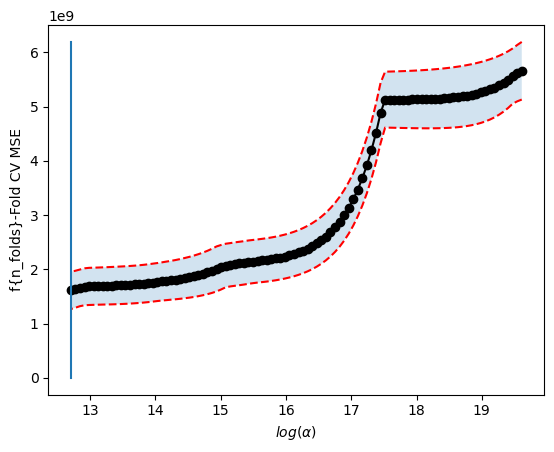

11 ['LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'Feat_roughLivingArea', 'Feat_LotsizeScore']

R² Score: 0.78
RMSE: 40655.83
MAE: 27166.53


In [322]:
y_pred_lasso,lasso = lasso_model(X_train, y_train, X_test, y_test, n_folds = 5)


In [312]:
lasso.alpha_ #regularization

329171.86053817533

In [313]:
y_pred_lasso = lasso.predict(X_test)
r2,rmse,mae = performance(y_test, y_pred_lasso)


R² Score: 0.78
RMSE: 40655.83
MAE: 27166.53


## SVR

In [84]:
from sklearn.svm import SVR # very bad results..
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)

(r2_train,rmse_train,mae_train), (r2_test,rmse_test,mae_test) = performance_both(y_train, y_pred_train, y_test, y_pred_test)


training performance

R² Score: -0.05
RMSE: 77042.91
MAE: 53583.36

test performance

R² Score: -0.05
RMSE: 89100.76
MAE: 59566.87


/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [85]:
def plot_pred_vs_actual(y_pred, y_actual):
    plt.scatter(y_pred, y_actual)
    xrange = np.linspace(min(y_actual), max(y_actual), 1000)
    plt.plot(xrange, xrange, color='red', linestyle='--', label='45° Line (y = x)')
    plt.xlabel('pred')
    plt.ylabel('actual')

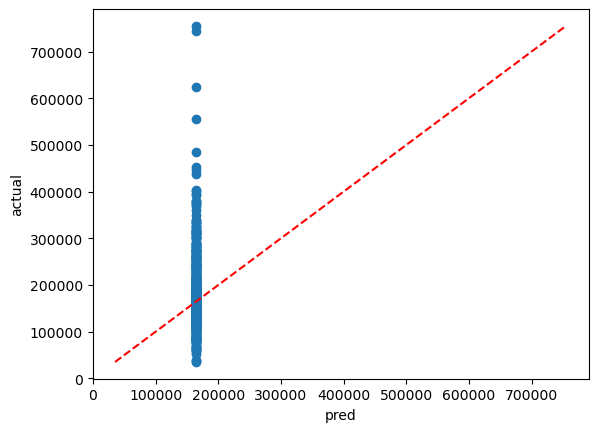

In [86]:
plot_pred_vs_actual(y_pred_test, y_test['SalePrice'])

## Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
# all columns 
dtree_all = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
y_pred_all = dtree_all.predict(X_test)
y_pred_all_train = dtree_all.predict(X_train)
(r2_train,rmse_train,mae_train), (r2_test,rmse_test,mae_test) = performance_both(y_train, y_pred_all_train, y_test, y_pred_all)


training performance

R² Score: 0.89
RMSE: 25440.05
MAE: 18730.46

test performance

R² Score: 0.68
RMSE: 49226.12
MAE: 27170.99


In [89]:
dtree_all.get_depth()

5

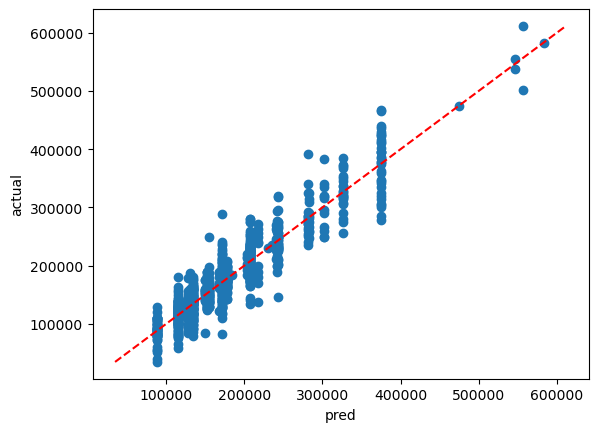

In [90]:
plot_pred_vs_actual(y_pred_all_train, y_train['SalePrice'])

In [91]:
dtree_all.feature_importances_.shape

(219,)

In [92]:
dtree_importance = pd.DataFrame(dtree_all.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

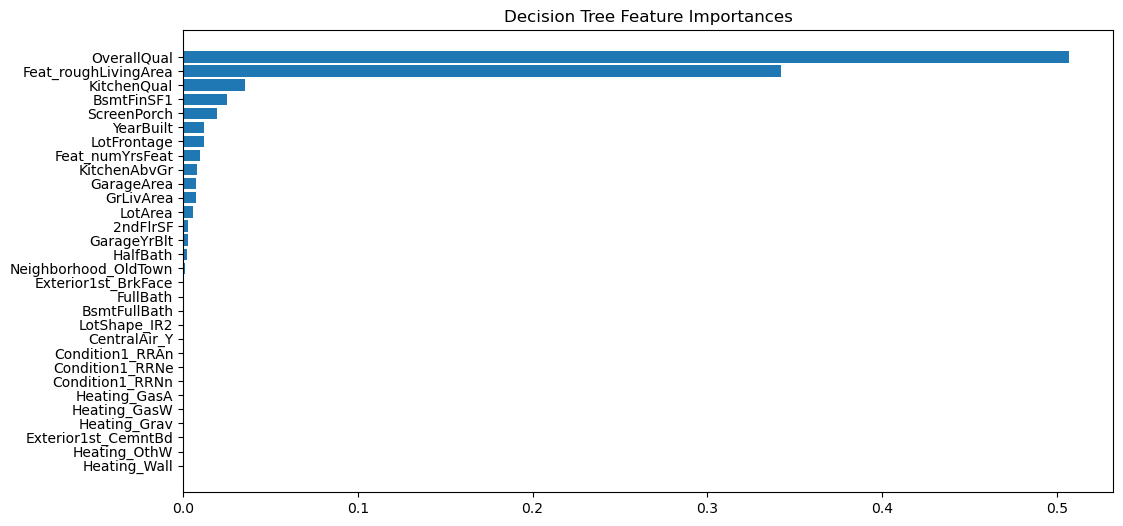

In [93]:
plt.figure(figsize=(12, 6))
plt.title("Decision Tree Feature Importances")
plt.barh(dtree_importance.index[:30], dtree_importance['importance'][:30])
plt.gca().invert_yaxis()
plt.show()

In [94]:
dtree_selected = dtree_importance.index[:40].to_list()

In [95]:
linear_dtree_selected= LinearRegression(fit_intercept=True).fit(X_train[dtree_selected], y_train)
y_pred_linear_dtree_selected = linear_dtree_selected.predict(X_test[dtree_selected])
r2,rmse,mae =performance(y_test, y_pred_linear_dtree_selected)


R² Score: 0.84
RMSE: 34662.83
MAE: 21710.39


## Random Forest Regressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=7, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2,rmse,mae =performance(y_test, y_pred_rf)

/opt/anaconda3/envs/py310/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




R² Score: 0.83
RMSE: 35593.45
MAE: 18222.41


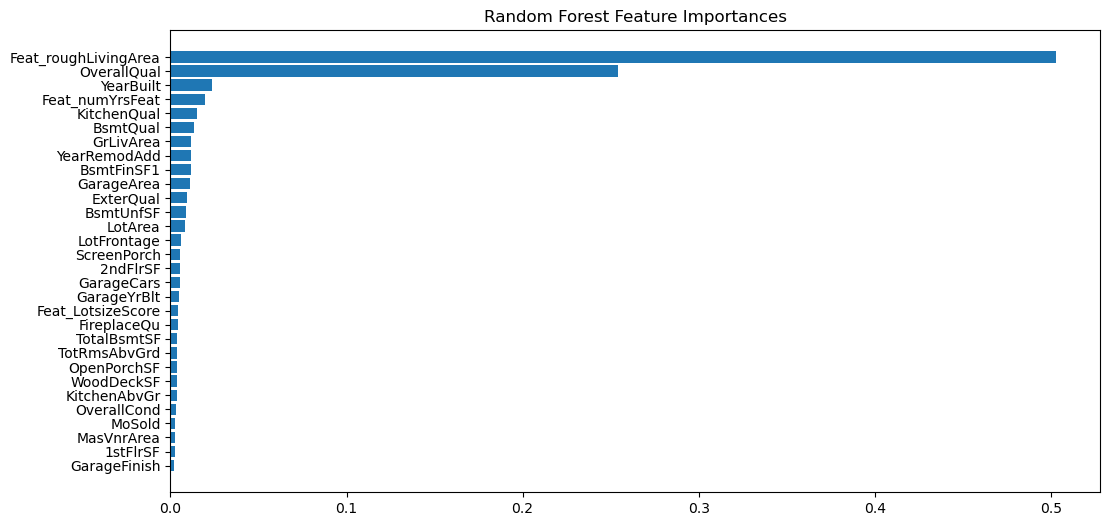

In [97]:
rf_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances")
plt.barh(rf_importances.index[:30], rf_importances['importance'][:30])
plt.gca().invert_yaxis()
plt.show()

In [98]:
rf_selected = rf_importances.index[:40].to_list()

In [99]:
linear_rf_selected= LinearRegression(fit_intercept=True).fit(X_train[rf_selected], y_train)
y_pred_linear_rf_selected = linear_rf_selected.predict(X_test[rf_selected])
r2,rmse,mae = performance(y_test, y_pred_linear_rf_selected)


R² Score: 0.83
RMSE: 35897.64
MAE: 21394.62


## XGBoost

In [100]:
import xgboost as xgb
train_dm = xgb.DMatrix(X_train.values, y_train)
test_dm = xgb.DMatrix(X_test.values, y_test)

param = {'max_depth': 6, # How deep should each tree be?
         'eta': 0.1, # The learning rate: how big are our steps?
         'verbosity': 0, # Whether to print out messages as you fit. 1 makes it quiet
         'objective':'reg:squarederror', # What is our loss function? For now, logistic - outputs probability. Would change for multiclass
         'gamma': 0, # Would make it harder to get splits in trees
         'subsample': 1, # How much to subsample for each tree. Smaller number (like 0.5) would subsample
         'colsample_bytree': 1, # like the random forest restriction on variables, sample of columns to get
         'lambda':0, # How much L2 penalty on the node weights
         'alpha':0, # How much L1 penalty on the node weights
         'eval_metric': 'mae', # this is the default eval_metric for logistic 
          'min_child_weight': 1,# Minimum sum of instance weights (hessian) in a child. 
         'seed': 1
        }
num_round = 100 # How many trees?

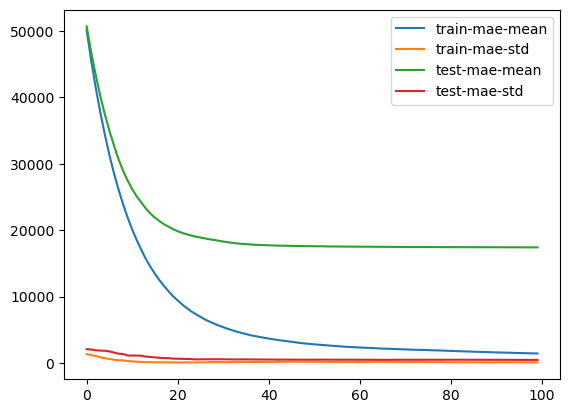

In [101]:
# cross validation for num tree
cvres = xgb.cv(param, train_dm, 100)
cvres.plot()
plt.show()

In [102]:
cvres.head()

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,50153.289254,1315.304339,50683.714165,2062.468186
1,45552.138506,1163.749794,46788.586541,2016.837655
2,41447.814334,1035.482799,43331.785938,1892.819562
3,37721.729508,852.610638,40199.934653,1857.672841
4,34386.840343,694.624685,37438.597543,1822.382276


In [103]:
best_rounds = np.argmin(cvres['test-mae-mean'])
best_rounds

98

In [104]:
xgbreg= xgb.train(param, train_dm, 50)
y_preds_xgbreg_train = xgbreg.predict(train_dm)
y_preds_xgbreg = xgbreg.predict(test_dm)
(r2_train,rmse_train,mae_train), (r2_test,rmse_test,mae_test) = performance_both(y_train, y_preds_xgbreg_train, y_test, y_preds_xgbreg)


training performance

R² Score: 1.00
RMSE: 4979.19
MAE: 3974.31

test performance

R² Score: 0.80
RMSE: 39215.79
MAE: 18346.32


In [105]:
all_dm=xgb.DMatrix(X.values, y)
xgbreg.predict(all_dm)
r2,rmse,mae = performance(y,y_pred=xgbreg.predict(all_dm))


R² Score: 0.92
RMSE: 22905.47
MAE: 8722.30


#### sklearn

In [106]:
from xgboost.sklearn import XGBRegressor
xgb_sklearn = XGBRegressor(max_depth= 6, # How deep should each tree be?
         eta= 0.1, # The learning rate: how big are our steps?
         verbosity= 0, # Whether to print out messages as you fit. 1 makes it quiet
         objective='reg:squarederror', # What is our loss function? For now, logistic - outputs probability. Would change for multiclass
         gamma= 1, # Minimum loss reduction
         subsample= 1, # How much to subsample for each tree. Smaller number (like 0.5) would subsample
         colsample_bytree=1, # like the random forest restriction on variables, sample of columns to get
         lam=0, # How much L2 penalty on the node weights
         alpha=0, # How much L1 penalty on the node weights
         eval_metric='mae', # this is the default eval_metric for logistic 
         min_child_weight = 1,# Minimum sum of instance weights (hessian) in a child. 
         seed= 1)


In [107]:
from sklearn.model_selection import GridSearchCV 
param_grid1 = {
    'max_depth': range(2, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'gamma': np.arange(0, 1, 0.5),
    'subsample': np.arange(0,1,0.3)

}

grid_search = GridSearchCV(estimator = xgb_sklearn, param_grid = param_grid1, 
                           scoring = 'neg_mean_squared_error', cv = 5).fit(X, y)

In [108]:
grid_search.best_params_

{'gamma': 0.0, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.6}

In [109]:
best_xgb_sklearn = grid_search.best_estimator_

In [110]:
y_pred_xgb_sklearn = best_xgb_sklearn.predict(X_test)
y_pred_xgb_sklearn_train = best_xgb_sklearn.predict(X_train)
(r2_train,rmse_train,mae_train), (r2_test,rmse_test,mae_test) = performance_both(y_train, y_pred_xgb_sklearn_train, y_test, y_pred_xgb_sklearn)


training performance

R² Score: 0.97
RMSE: 12080.08
MAE: 8939.60

test performance

R² Score: 0.98
RMSE: 12441.48
MAE: 9288.14


In [111]:
best_xgb_importance = pd.DataFrame(best_xgb_sklearn.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

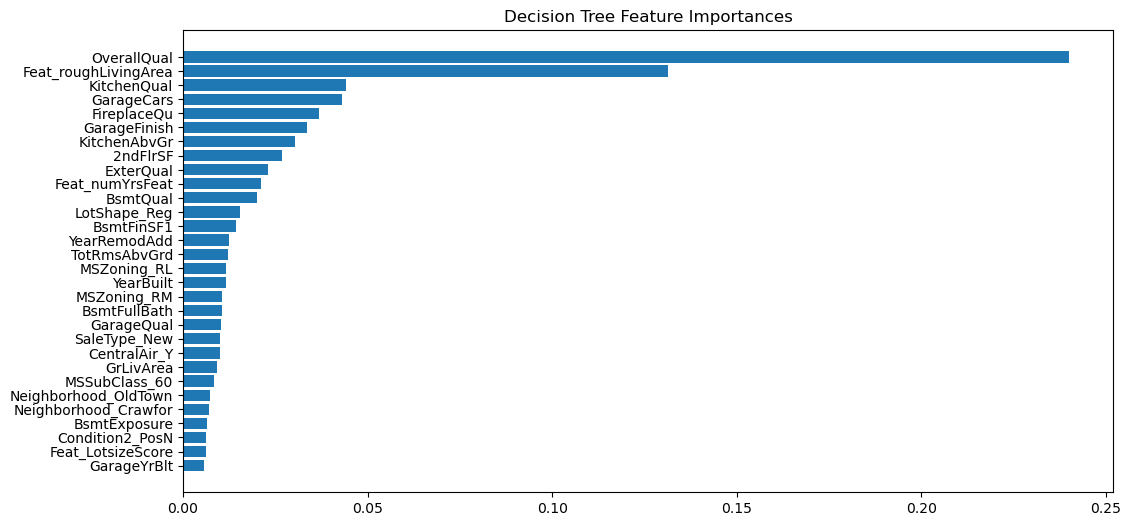

In [112]:
plt.figure(figsize=(12, 6))
plt.title("Decision Tree Feature Importances")
plt.barh(best_xgb_importance.index[:30], best_xgb_importance['importance'][:30])
plt.gca().invert_yaxis()
plt.show()

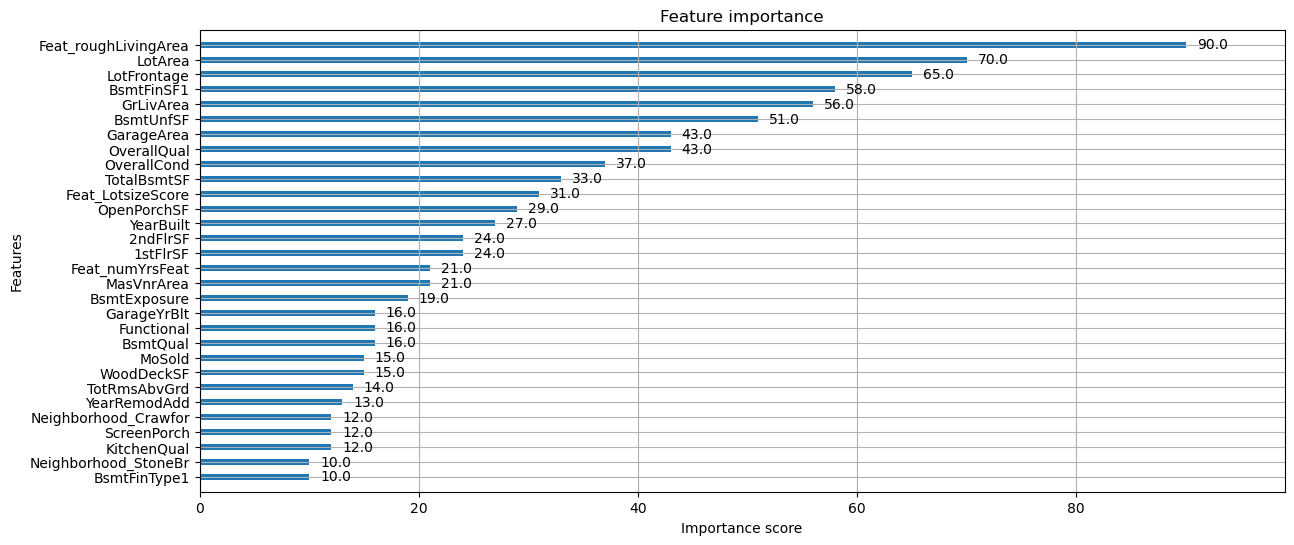

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
xgb.plot_importance(best_xgb_sklearn, 
                    # importance_type='weight',  
                    max_num_features=30, 
                    height=0.4,
                    ax=ax)
                    
plt.show()

## Neural Network

In [114]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.auto import tqdm
import gc

In [115]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device: ", device)

Device:  cpu


In [116]:
config = {
    'epochs'        : 10,
    'batch_size'    : 64,
    'init_lr'       : 1e-3,
    # Add more as you need them - e.g dropout values, weight decay, scheduler parameters
}

In [117]:
from torch.utils.data import TensorDataset, DataLoader

# Create TensorDatasets for train and test sets
train_dataset = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.float32)
)
val_dataset = TensorDataset(
    torch.tensor(X_test.values, dtype=torch.float32),
    torch.tensor(y_test.values, dtype=torch.float32)
)

test_dataset = TensorDataset(
    torch.tensor(test_features.values, dtype=torch.float32))

# Create DataLoaders for batching
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False)

print("Train dataset samples = {}, batches = {}".format(train_dataset.__len__(), len(train_loader)))
print("Validation dataset samples = {}, batches = {}".format(val_dataset.__len__(), len(val_loader)))
print("Test dataset samples = {}, batches = {}".format(test_dataset.__len__(), len(test_loader)))

Train dataset samples = 977, batches = 16
Validation dataset samples = 482, batches = 8
Test dataset samples = 1459, batches = 23


In [118]:
# example of data
for batch_idx, (example_data, example_targets) in enumerate(train_loader):
    print(batch_idx, example_data.shape, example_targets.shape)
    break

0 torch.Size([64, 219]) torch.Size([64, 1])


In [119]:
class FeedForward(nn.Module):
    def __init__(self, input_size, output_size):
        super(FeedForward, self).__init__()
        # self.flatten = nn.Flatten()
        self.hidden_layer_1 = nn.Linear(input_size, 126)
        self.hidden_layer_2 = nn.Linear(126, 63)
        self.output_layer = nn.Linear(63, output_size)

    def forward(self, x):
        # x = self.flatten(x)
        x = self.hidden_layer_1(x)
        x = torch.relu(x)
        x = self.hidden_layer_2(x)
        x = torch.relu(x)
        x = self.output_layer(x)
        x = F.relu(x)
        return x

In [120]:
def train(model, dataloader, optimizer, criterion, scheduler):

    model.train()
    tloss, tacc = 0, 0 # Monitoring loss and accuracy
    batch_bar   = tqdm(total=len(train_loader), dynamic_ncols=True, leave=False, position=0, desc='Train')
    
    for batch_idx, (data, target)  in enumerate(dataloader):
        
        ### Initialize Gradients
        optimizer.zero_grad()

        ### Move Data to Device (Ideally GPU)
        data      = data.to(device)
        target    = target.to(device)

        ### Forward Propagation
        pred    = model(data)

        ### Loss Calculation
        loss    = criterion(pred, target)

        ### Backward Propagation
        loss.backward() 
        
        ### Gradient Descent
        optimizer.step()
        
        tloss  += loss.item()

        batch_bar.set_postfix(loss="{:.04f}".format(float(tloss / (batch_idx + 1))))
        batch_bar.update()

        ### Release memory
        del data, target, pred
        torch.cuda.empty_cache()
        
    # scheduler.step()
    batch_bar.close()
    tloss   /= len(train_loader)
    return tloss

In [121]:
def eval(model, dataloader, criterion):

    model.eval() # set model in evaluation mode
    vloss, vacc = 0, 0 # Monitoring loss and accuracy
    batch_bar   = tqdm(total=len(dataloader), dynamic_ncols=True, position=0, leave=False, desc='Val')

    for batch_idx, (data, target) in enumerate(dataloader):

        ### Move data to device (ideally GPU)
        data      = data.to(device)
        target    = target.to(device)

        # makes sure that there are no gradients computed as we are not training the model now
        with torch.inference_mode(): 
            ### Forward Propagation
            pred  = model(data)
            ### Loss Calculation
            loss    = criterion(pred, target)

        vloss   += loss.item()
        
        batch_bar.set_postfix(loss="{:.04f}".format(float(vloss / (batch_idx + 1))))
        batch_bar.update()
    
        ### Release memory
        del data, target, pred
        torch.cuda.empty_cache()

    batch_bar.close()
    vloss   /= len(val_loader)
    return vloss

In [122]:
def train_and_val(model, train_loader, val_loader, optimizer, criterion, scheduler):

    # Iterate over number of epochs to train and evaluate your model
    torch.cuda.empty_cache()
    gc.collect()
    min_loss = 0.0
    train_losses= []
    val_losses=[]
    for epoch in range(config['epochs']):

        print("\nEpoch {}/{}".format(epoch+1, config['epochs']))

        curr_lr                 = float(optimizer.param_groups[0]['lr']) 
        # curr_lr                 = float(scheduler.get_lr()[0]) 
        train_loss   = train(model, train_loader, optimizer, criterion, scheduler)
        val_loss     = eval(model, val_loader,criterion)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        scheduler.step()
        
        
        print(f"\tTrain Loss {train_loss}\t Learning Rate {curr_lr}")
        print("\tVal Loss {:.04f}".format(val_loss))

        
        if min_loss >= val_loss:
            min_loss=val_loss
    return train_losses, val_losses

In [123]:
network = FeedForward(219,1)
criterion = nn.L1Loss()
optimizer = optim.Adam(network.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.ConstantLR(optimizer, factor=1, total_iters=10)

In [124]:
config['epochs']= 10

In [125]:
train_losses, val_losses = train_and_val(network, train_loader, val_loader, optimizer, criterion,scheduler)


Epoch 1/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 180204.5615234375	 Learning Rate 0.01
	Val Loss 183753.2793

Epoch 2/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 181828.416015625	 Learning Rate 0.01
	Val Loss 181242.4668

Epoch 3/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 180997.224609375	 Learning Rate 0.01
	Val Loss 182852.7832

Epoch 4/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 179861.07421875	 Learning Rate 0.01
	Val Loss 182966.7988

Epoch 5/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 179119.2900390625	 Learning Rate 0.01
	Val Loss 182439.0234

Epoch 6/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 180124.9658203125	 Learning Rate 0.01
	Val Loss 183502.7246

Epoch 7/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 179394.259765625	 Learning Rate 0.01
	Val Loss 182414.7480

Epoch 8/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 180266.2109375	 Learning Rate 0.01
	Val Loss 182116.2852

Epoch 9/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 180062.4814453125	 Learning Rate 0.01
	Val Loss 183007.5508

Epoch 10/10


Train:   0%|          | 0/16 [00:00<?, ?it/s]

Val:   0%|          | 0/8 [00:00<?, ?it/s]

	Train Loss 179689.1982421875	 Learning Rate 0.01
	Val Loss 182073.1719


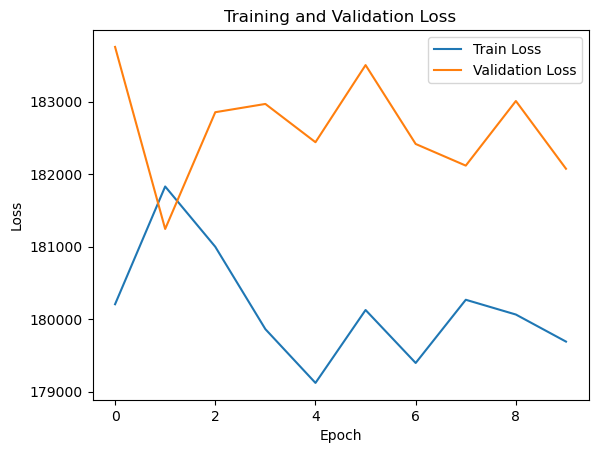

In [126]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [127]:
for batch_idx, (data) in enumerate(tqdm(test_loader)): 
    print(batch_idx,data[0].shape)
    break

  0%|          | 0/23 [00:00<?, ?it/s]

0 torch.Size([64, 219])


In [128]:
def test(model, test_loader):
    ### What you call for model to perform inference?
    model.eval()

    ### List to store predicted phonemes of test data
    test_predictions = []

    ### Which mode do you need to avoid gradients?
    with torch.no_grad(): 

        for batch_idx, data in enumerate(tqdm(test_loader)):

            data   = data[0].to(device)             
            
            pred  = model(data)

            ### How do you store predicted_phonemes with test_predictions? Hint, look at eval 
            test_predictions.extend(pred.cpu().tolist())

    return test_predictions

In [129]:
nn_pred = test(network, test_loader)

  0%|          | 0/23 [00:00<?, ?it/s]

# Prediction and Submission

In [324]:
y_test_pred = dtree_all.predict(test).flatten()
y_test_pred_df = pd.DataFrame({'Id': test.index, 'SalePrice': y_test_pred})
y_test_pred_df.to_csv('dtree_all_overfit.csv', index=False)
y_test_pred_df
# !kaggle competitions submit -c house-prices-advanced-regression-techniques -f dtree_all_overfit.csv -m "dtree all training set, subject to overfitting"

,Id,SalePrice
0,1461,115624.385965
1,1462,155489.666667
2,1463,171888.141667
3,1464,208038.105634
4,1465,167687.500000
...,...,...
1454,2915,115624.385965
1455,2916,115624.385965
1456,2917,134291.366972
1457,2918,128490.372881
